In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales', axis=1)
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
poly_features = polynomial_converter.transform(X)

In [10]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
test_predictions = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
MAE = mean_absolute_error(y_test, test_predictions)

In [19]:
MSE = mean_squared_error(y_test, test_predictions)

In [20]:
RMSE = np.sqrt(MSE)

In [21]:
MAE

0.4896798044803882

In [22]:
RMSE

0.6646431757269331

In [23]:
# create the different order polynomial
# split poly feat train/test
# fit on train
# store/save the rmse for both the train and test
# plot the results (error vs poly order)

In [24]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    


In [25]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292232,
 0.43393443569020695,
 0.35170836883993495,
 0.2509342985452862,
 0.19450408302941924,
 5.422037999955417,
 0.14316498242465053,
 0.17225838249897468]

In [26]:
test_rmse_errors

[1.5161519375993882,
 0.6646431757269331,
 0.5803286825228429,
 0.5077742638721316,
 2.575824008063545,
 4.2747822867929735,
 1378.6168198430341,
 4335.079838291257,
 99214.65544907791]

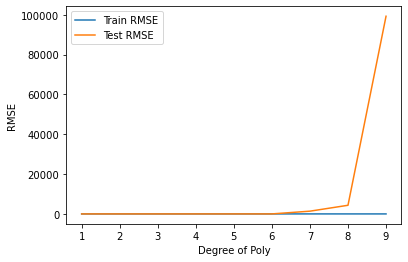

In [27]:
plt.plot(range(1,10), train_rmse_errors, label = 'Train RMSE')
plt.plot(range(1,10), test_rmse_errors, label = 'Test RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

In [28]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [29]:
final_model = LinearRegression()

In [30]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [31]:
from joblib import dump, load

In [32]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [33]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [34]:
loaded_converter = load('final_converter.joblib')

In [35]:
loaded_model = load('final_poly_model.joblib')

In [36]:
campaign = [[149,22,12]]

In [37]:
transformed_data = loaded_converter.fit_transform(campaign)

In [38]:
loaded_model.predict(transformed_data)

array([14.64501014])

In [39]:
# regularization for linear regression: ridge regression, lasso regression, elastic net

In [40]:
df = pd.read_csv('Advertising.csv')

In [41]:
X = df.drop('sales', axis = 1)

In [42]:
y = df['sales']

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [45]:
poly_features = polynomial_converter.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [48]:
X_train.shape

(140, 19)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
scaler.fit(X_train)

StandardScaler()

In [52]:
X_train = scaler.transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

In [54]:
# regularization: ridge regression

In [55]:
from sklearn.linear_model import Ridge

In [56]:
ridge_model = Ridge(alpha=10)

In [57]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [58]:
test_predictions = ridge_model.predict(X_test)

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [60]:
MAE = mean_absolute_error(y_test, test_predictions)

In [61]:
MAE

0.577440420471417

In [62]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [63]:
RMSE

0.8946386461319659

In [64]:
from sklearn.linear_model import RidgeCV

In [70]:
ridge_cv_model = RidgeCV(alphas = (0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

In [71]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [72]:
ridge_cv_model.alpha_

0.1

In [68]:
from sklearn.metrics import SCORERS

In [69]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [73]:
test_predictions = ridge_cv_model.predict(X_test)

In [74]:
MAE = mean_absolute_error(y_test, test_predictions)

In [75]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [76]:
MAE

0.42737748843429757

In [77]:
RMSE

0.618071992694145

In [78]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

In [79]:
ridge_cv_model.best_score_

-0.3749223340292961

In [80]:
# LASSO - least absolute shrinkage and selection operator

In [81]:
from sklearn.linear_model import LassoCV

In [87]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5)

In [88]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, eps=0.1)

In [89]:
lasso_cv_model.alpha_

0.49430709092258324

In [90]:
test_predictions = lasso_cv_model.predict(X_test)

In [91]:
MAE = mean_absolute_error(y_test, test_predictions)

In [92]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [93]:
MAE

0.6541723161252868

In [94]:
RMSE

1.1308001022762548

In [95]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [112]:
lasso_cv_model2 = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [113]:
lasso_cv_model2.fit(X_train, y_train)

LassoCV(cv=5, max_iter=1000000)

In [114]:
lasso_cv_model2.alpha_

0.004943070909225833

In [115]:
test_predictions = lasso_cv_model2.predict(X_test)

In [116]:
MAE = mean_absolute_error(y_test, test_predictions)

In [117]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [118]:
MAE

0.43350346185900795

In [119]:
RMSE

0.6063140748984042

In [120]:
lasso_cv_model2.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

In [121]:
# Elastic Net

In [122]:
from sklearn.linear_model import ElasticNetCV

In [125]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, 1], eps=0.001, n_alphas=100, max_iter=1000000)

In [126]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=1000000)

In [129]:
elastic_model.l1_ratio_

1.0

In [130]:
elastic_model.alpha_

0.004943070909225833

In [131]:
lasso_cv_model2.alpha_

0.004943070909225833

In [132]:
test_predictions = elastic_model.predict(X_test)

In [133]:
MAE = mean_absolute_error(y_test, test_predictions)

In [134]:
MAE

0.43350346185900795